# Python Assignment 3

⏱⏱⏱**Due: 11/02/2023 11:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace. **Please include all outputs in your notebook, including plots, printouts, etc..**

Collaboration is permitted and encouraged; however, it's essential to independently produce and submit your own work. If you collaborate with others, please ensure that you provide their names in the designated section.

Collaborators:_____

##**For Questions 2a and 2b, you can choose one of them to complete, if you completed both, only Questions 2a will be graded.**

**This assignment is out of 150 points; surplus points can be applied to other assignments (including Matlab and C/C++). However, it cannot be applied to your final project grade, and your assignment grade will not excced 75% of your total grade.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, **include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.** Do not submit a compressed file (.rar, .zip, etc..), submit files separately.

If you are tasked with implementing a numerical algorithm, it is expected that you would not rely on pre-existing methods. For example, if you were asked to solve $Ax=b$, you should write your own program to solve, not just by calling numpy.linalg.solve.



## 2a. Numerical Integration (30 pts)

For a domain discretized into $N$ equally spaced panels:
$$
\Delta x=\frac{b-a}{N}.
$$
The approximation to the integral is
$$\begin{aligned}
\int_a^b f(x) d x & \approx \frac{\Delta x}{2} \sum_{k=1}^N\left(f\left(x_{k-1}\right)+f\left(x_k\right)\right) \\
& =\frac{\Delta x}{2}\left(f\left(x_0\right)+2 f\left(x_1\right)+2 f\left(x_2\right)+2 f\left(x_3\right)+\cdots+2 f\left(x_{N-1}\right)+f\left(x_N\right)\right) \\
& =\Delta x\left(\sum_{k=1}^{N-1} f\left(x_k\right)+\frac{f\left(x_N\right)+f\left(x_0\right)}{2}\right) .
\end{aligned}$$
This is the trapezoid rule scheme.


Given the function $f(x) = 3x^2 + 2x +2$, your tasks are:

1. Carry out the integration symbolically using the SymPy library. Output the result (i.e. print out the result).
2. Implement the trapezoid rule to estimate the integral $\int_{-4}^6 f(x) dx$ using the following values of $N = 10, 20, 40, 80, 160, 320, 640, 1280$. Output the results (i.e. print out the results).
3. Plot the absolute error (absolute difference between the numerical approximation and the SymPy result) against N.





In [7]:
# import the library
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# define the symbol and function
x = sp.symbols('x')
f = 3* x**2 + 2 * x + 2

In [9]:
# integration symbolically
result = sp.integrate(f,x)
print("symbolic result： " ,result)

symbolic result：  x**3 + x**2 + 2*x


In [10]:
# define the function for numerical integration
def f(x):
    return 3*x**2 + 2*x + 2

a = -4
b = 6

# integration limits
x = sp.symbols('x')
# symbolic integration
integral_result = sp.integrate(f(x), (x, -4, 6))

# define the values of N
N_values = [10, 20, 40, 80, 160, 320, 640, 1280]

# lists for storing results and errors
results = []
errors = []

# iterate over different values of N
for N in N_values:
    deltax = (b-a)/N
    sum_result = 0
    for k in range(1,N):
        sum_result += f(a + k * deltax)
    # compute the result using the trapezoidal rule
    result = deltax * (sum_result + (f(a)+f(b))/2)
    results.append(result)
    # calculate and store the error
    errors.append(abs(result - integral_result))
    # print the result
    print(f"when N={N} result is {result}")


when N=10 result is 325.0
when N=20 result is 321.25
when N=40 result is 320.3125
when N=80 result is 320.078125
when N=160 result is 320.01953125
when N=320 result is 320.0048828125
when N=640 result is 320.001220703125
when N=1280 result is 320.00030517578125


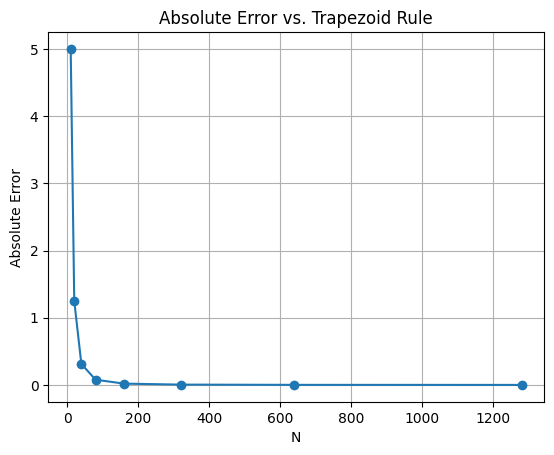

In [11]:
# plot the result
plt.figure()
plt.plot(N_values,errors,marker='o')
plt.xlabel('N')
plt.ylabel('Absolute Error')
plt.title('Absolute Error vs. Trapezoid Rule')
plt.grid()

plt.show()


## 2b. Numerical Differentiation (30 pts)

Your tasks:
1. Find the closed form expression of $f_{xy}(x,y)$, i.e. $\frac{d^2}{dxdy}f(x,y)$, for $f(x,y) = \left(sin^2\left(x\right)e^xcos(y)\right)$ using `sympy`. Output the result.
2. Find $f_{xy}(2,3)$ with `sympy` and take 15 significant digits, use it as the "groud truth solution". Output the result.
3. Approximate $f_{xy}(2,3)$ using central difference approximation for the following values of $h = 0.1, 0.01, 0.001, 0.0001$. Output the results.
4. Plot the absolute error (absolute difference between the numerical approximation and the SymPy result) against the step size $h$. `plt.gca().invert_xaxis() ` might help.

Recall from the lecture:
$$f_{x y}(x, y) \approx \frac{f(x+h, y+k)-f(x+h, y-k)-f(x-h, y+k)+f(x-h, y-k)}{4 h k}.$$
For simplicity, we set $k = h$.

## 3. Pandas I (15 pts)

1. Create a 3x4 (3 rows by 4 columns) pandas DataFrame with the columns named after the following Long Island towns: Hempstead, Babylon, Islip, and Brookhaven. The rows represent 'Population in 2099', 'Population in 2300', 'Population in 2400'. Fill each of the 12 cells in the DataFrame with a random integer from 1000 to 10000, inclusive. `np.random.randint()` might be helpful.
For Example:

```
                    Hempstead  Babylon  Islip  Brookhaven
Population in 2099       2931     8043   8414        8661
Population in 2300       5444     9227   7393        8007
Population in 2400       1660     7977   4730        2940
```



2. Output the following:
  - The entire DataFrame.
  - The value in the cell of row #1 (indexing starts with 0) under the Hempstead column.

3. Add a new column named Riverhead. Populate this column with the sum of the respective row values from the Islip and Brookhaven columns. Output the entire DataFrame again.

In [12]:
#import the library
import pandas as pd
import numpy as np

In [13]:
#creat the row and columns name
towns = ['Hempstead', 'Babylon', 'Islip', 'Brookhaven']
poplulation = ['Population in 2099', 'Population in 2300', 'Population in 2400']

#define the data
data = np.random.randint(1000, 10000, size=(3,4))
# creat the dataframe
df = pd.DataFrame(data,columns=towns,index=poplulation)

print(df)

                    Hempstead  Babylon  Islip  Brookhaven
Population in 2099       3076     1735   2418        9000
Population in 2300       2400     8771   6483        2574
Population in 2400       6430     6166   4718        4232


In [14]:
#show the value of row#1
df['Hempstead'].iloc[1]

2400

In [15]:
#add new column
df['Riverhead'] = df['Islip'] + df['Brookhaven']

print(df)

                    Hempstead  Babylon  Islip  Brookhaven  Riverhead
Population in 2099       3076     1735   2418        9000      11418
Population in 2300       2400     8771   6483        2574       9057
Population in 2400       6430     6166   4718        4232       8950


## 4. Pandas II (15 pts)

0. Download the cvs file that comes with this assignment, and read it into a dataframe. You can also download this [csv file](https://media.githubusercontent.com/media/datablist/sample-csv-files/main/files/customers/customers-100.csv) with this link.
1. Arrange the data in alphabetical order based on the last name. Display the first few rows.
2. Count the number of customers whose subscription date is in 2021 (2021-01-01 to 2021-12-31). Report this number (e.g. print).

In [16]:
#import the library
import pandas as pd

In [17]:
from google.colab import files
uploaded = files.upload()


Saving customers-100.csv to customers-100.csv


In [18]:
#creat the dataframe and read
df = pd.read_csv('customers-100.csv')
print(df.head())

   Index      Customer Id First Name Last Name  \
0      1  DD37Cf93aecA6Dc     Sheryl    Baxter   
1      2  1Ef7b82A4CAAD10    Preston    Lozano   
2      3  6F94879bDAfE5a6        Roy     Berry   
3      4  5Cef8BFA16c5e3c      Linda     Olsen   
4      5  053d585Ab6b3159     Joanna    Bender   

                           Company               City  \
0                  Rasmussen Group       East Leonard   
1                      Vega-Gentry  East Jimmychester   
2                    Murillo-Perry      Isabelborough   
3  Dominguez, Mcmillan and Donovan         Bensonview   
4         Martin, Lang and Andrade     West Priscilla   

                      Country                 Phone 1                Phone 2  \
0                       Chile            229.077.5154       397.884.0519x718   
1                    Djibouti              5153435776       686-620-1820x944   
2         Antigua and Barbuda         +1-539-402-0259    (496)978-3969x58947   
3          Dominican Republic  001-8

In [19]:
#arrange the data and display first few rows
df_sort = df.sort_values(by='Last Name')
print(df_sort.head())

    Index      Customer Id First Name Last Name                Company  \
67     68  a014Ec1b9FccC1E        Tom  Alvarado    Donaldson-Dougherty   
96     97  CeD220bdAaCfaDf       Lynn  Atkinson  Ware, Burns and Oneal   
92     93  aAb6AFc7AfD0fF3     Collin     Ayers          Lamb-Peterson   
0       1  DD37Cf93aecA6Dc     Sheryl    Baxter        Rasmussen Group   
15     16  8cad0b4CBceaeec    Miranda   Beasley     Singleton and Sons   

                City    Country             Phone 1                Phone 2  \
67  South Sophiaberg   Kiribati  (585)606-2980x2258      730-797-3594x5614   
96      New Bradview  Sri Lanka     +1-846-706-2218           605.413.3198   
92      South Lonnie   Anguilla    404-645-5351x012  001-257-582-8850x8516   
0       East Leonard      Chile        229.077.5154       397.884.0519x718   
15      Desireeshire       Oman    540.085.3135x185  +1-600-462-6432x21881   

                            Email Subscription Date  \
67  nicholsonnina@montgomery.in

In [20]:
# convert to datetime format
df['Subscription Date'] = pd.to_datetime(df['Subscription Date'])

In [21]:
# count the number of customers of 2021
customer = df[df['Subscription Date'].dt.year == 2021]
num = len(customer)
print(customer.head())


   Index      Customer Id First Name  Last Name                       Company  \
1      2  1Ef7b82A4CAAD10    Preston     Lozano                   Vega-Gentry   
4      5  053d585Ab6b3159     Joanna     Bender      Martin, Lang and Andrade   
6      7  EA4d384DfDbBf77     Darren       Peck  Lester, Woodard and Mitchell   
7      8  0e04AFde9f225dE      Brett     Mullen  Sanford, Davenport and Giles   
9     10  8C2811a503C7c5a   Michelle  Gallagher                  Beck-Hendrix   

                City                     Country                 Phone 1  \
1  East Jimmychester                    Djibouti              5153435776   
4     West Priscilla  Slovakia (Slovak Republic)  001-234-203-0635x76146   
6           Lake Ana            Pitcairn Islands      (496)452-6181x3291   
7            Kimport                    Bulgaria    001-583-352-7197x297   
9         Elaineberg                 Timor-Leste        739.218.2516x459   

                 Phone 2                    Email Subscr

In [22]:
print(num)

43


## 5. LU decomposition (50 + 30 pts)


Part A (50 points)
1. Write a function `LUdecomposition()` that takes as input a matrix $A\in \mathbb{R}^{n \times n}$. Perform Gaussian Elimination to have this function return two matrices $L$ and $U$ such that $A=LU$.
2. Your function should raise any relevant errors, for example, raise an error if a pure LU decomposition does not exist for $A$ (meaning that you have to perform pivoting, i.e., permutation of rows).
3. Create several random matrices for the purpose of testing your function. Obtain the $L$ and $U$ matrices, and for each random matrix obtain its L and U matrices and perform a matrix multiplication (`np.matmul()`) to determine whether the outcome closely resembles the original matrix $A$, allowing for slight differences attributable to precision errors.


Note: LU decomposition with Gaussian elimination should be covered in your undergraduate linear algebra class. It is also covered in AMS 510. If you do not know how, this 10 minute [video](https://www.youtube.com/watch?v=UlWcofkUDDU&ab_channel=Mathispower4u) explains it very well.

Part B (30 bonus points)
4. Not all square matrices have a pure LU decomposition. However, PLU decomposition always exists. Write another function `pivoting()` that takes as input a matrix $A$ and return the permutation/pivoting matrix $P$ such that $PA$ always has a pure LU decomposition.
5. Find an example $A$ for which `LUdecomposition()` raises an error. Then, use `pivoting()` to find $P$, and find the pure LU decomposition of $PA$. Verify that indeed $PA = LU$ with matrix multiplication (`np.matmul()`).


Hint: Please do not print out a giant matrix and visually examine the outcomes. Think of a way to verify your results and output a boolean value.


In [75]:
# import the library
import numpy as np

In [76]:
# LU decomposition
def LUdecomposition(A):
    A = A.astype('float64')
    n = len(A)
    L = np.zeros((n,n))
    U = np.copy(A)

    # loop over the rows and columns
    for i in range(n):
      # find row with the maximum value
        max_row = max(range(i,n), key=lambda x: abs(U[x,i]))
        if max_row != i:
            U[[i,max_row]] = U[[max_row,i]]
            L[[i,max_row]] = L[[max_row,i]]
            if i >= 1:
                L[[i,max_row],:i] = L[[max_row,i],:i]
        #  raise error if the LU decomposition doesnot exist
        if U[i,i] == 0:
            raise ValueError("LU decomposition does not exist")

        L[i,i] = 1
        # perform Gaussian elimination
        for j in range(i+1,n):
            L[j,i] = U[j,i] / U[i,i]
            U[j,:] -= L[j,i] * U[i,:]

    return L,U

In [77]:
# create input matrix
A = np.array([[1,-1,1],[-1,-1,1],[-1,1,1]])
# apply LU decomposition
L,U = LUdecomposition(A)

print("L:")
print(L)
print("U:")
print(U)

L:
[[ 1.  0.  0.]
 [-1.  1.  0.]
 [-1. -0.  1.]]
U:
[[ 1. -1.  1.]
 [ 0. -2.  2.]
 [ 0.  0.  2.]]


In [78]:
# test LU decomposition of random matrices
for i in range(5):
    A_test = np.random.rand(3,3)
    L,U = LUdecomposition(A_test)
    # reconstruct the original matrix from the decomposed matrices
    A_reconstructed = np.matmul(L,U)
    # calculate maximum absolute error
    error = np.max(np.abs(A_test - A_reconstructed))

    print("original matrix A:")
    print(A_test)
    print("reconstructed A:")
    print(A_reconstructed)
    print(f"max absolute error: {error}")

original matrix A:
[[0.32622349 0.82062627 0.0773658 ]
 [0.03636596 0.68506823 0.36299385]
 [0.94037034 0.17051799 0.41166603]]
reconstructed A:
[[ 0.94037034  0.17051799  0.41166603]
 [ 0.03636596  0.76806621 -0.04952516]
 [ 0.32622349  0.73762829  0.48988482]]
max absolute error: 0.6501082841763606
original matrix A:
[[0.39856856 0.51057346 0.15690928]
 [0.98266621 0.63275257 0.92966886]
 [0.63970549 0.63589813 0.60099903]]
reconstructed A:
[[0.98266621 0.63275257 0.92966886]
 [0.39856856 0.51057346 0.15690928]
 [0.63970549 0.63589813 0.60099903]]
max absolute error: 0.7727595811514726
original matrix A:
[[0.24621572 0.28668015 0.16683275]
 [0.70751981 0.85613822 0.21944594]
 [0.0620833  0.40345845 0.96571044]]
reconstructed A:
[[0.70751981 0.85613822 0.21944594]
 [0.24621572 0.62626889 1.02282136]
 [0.0620833  0.06386971 0.10972182]]
max absolute error: 0.8559886135215135
original matrix A:
[[0.14462775 0.55547391 0.77659425]
 [0.19490942 0.34874051 0.22267344]
 [0.46692842 0.935137

In [79]:
# partial pivoting
def pivoting(A):
    #extract dimension
    n = A.shape[0]
    P = np.eye(n)

    # loop through the rows
    for i in range(n):
        # find the row with the maximum absolute value
        max_row = np.argmax(np.abs(A[i:,i])) + i
        # swap row if the current row is not the row with the maximum absolute value
        if i != max_row:
            P[[i,max_row]] = P[[max_row,i]]

    return P

# example
A_example = np.array([[1,2,3],[4,5,6],[7,8,9]])
# apply partial pivoting
P_example = pivoting(A_example)
print("P:")
print(P_example)
print("PA:")
print(np.matmul(P_example, A_example))


P:
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
PA:
[[7. 8. 9.]
 [1. 2. 3.]
 [4. 5. 6.]]


In [80]:
# LU decomposition
def LUdecomposition(A):
    n = A.shape[0]
    L = np.eye(n)
    U = A.copy()

    # loop through the column
    for k in range(n):
        if U[k,k] == 0:
            # raise error
            raise ValueError("LU decomposition does not exist")

        #Gaussian elimination
        for i in range(k+1,n):
            # calculate the factor for the current row
            factor = U[i,k]/U[k,k]
            # the lower triangular matrix with the factor
            L[i,k] = factor
            # remain part of the matrix after elimination
            U[i,k:] -= factor * U[k,k:]

    return L,U

In [81]:
# partial pivoting same as before
def pivoting(A):
    #extract dimension
    n = A.shape[0]
    P = np.eye(n)

    # loop through the rows
    for i in range(n):
        # find the row with the maximum absolute value
        max_row = np.argmax(np.abs(A[i:,i])) + i
        # swap row if the current row is not the row with the maximum absolute value
        if i != max_row:
            P[[i,max_row]] = P[[max_row,i]]

    return P

# example
A_example = np.array([[1,2,3],[4,5,6],[7,8,9]])
# apply partial pivoting
P_example = pivoting(A_example)

# calculate PA
PA = np.matmul(P_example,A_example)
# apply LU decomposition to PA
L,U = LUdecomposition(PA)

# reconstruct PA
PA_reconstructed = np.matmul(L,U)

In [82]:
# print results
print("A:")
print(A_example)
print("P:")
print(P_example)
print("PA:")
print(PA)
print("L:")
print(L)
print("U:")
print(U)
print("LU:")
print(PA_reconstructed)

A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
P:
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
PA:
[[7. 8. 9.]
 [1. 2. 3.]
 [4. 5. 6.]]
L:
[[1.         0.         0.        ]
 [0.14285714 1.         0.        ]
 [0.57142857 0.5        1.        ]]
U:
[[7.00000000e+00 8.00000000e+00 9.00000000e+00]
 [0.00000000e+00 8.57142857e-01 1.71428571e+00]
 [0.00000000e+00 5.55111512e-17 1.11022302e-16]]
LU:
[[7. 8. 9.]
 [1. 2. 3.]
 [4. 5. 6.]]


Fact: LU and PLU decompositions are not unique.

## 6. Markov Chain (30 pts)

**BACKGROUND:** Consider a Markov chain transition matrix $P$ on a set of $n$ states, where $P_{i j}$ corresponds to the probability $\left(0 \leq P_{i j} \leq 1\right)$ to go from state $i$ to the state $j$, and each row is normalized so that
$$
\sum_{j=1}^n P_{i j}=1 .
$$

Let $p$ be a size- $n$ vector composed of the probability distribution over the $n$ states, where
$$
\sum_{j=1}^n p_j=1 .
$$

The transition rule corresponding to the transition matrix $P$ is $\hat{p}=P^T p$, where $\hat{p}$ corresponds to a new probability distribution and
$$
\sum_{j=1}^n \hat{p}_j=1 .
$$
TASK: Write a program that works with 5 states `only use the numpy library`. In particular,
0. Fix the random seed to be the last digit of your id: `numpy.random.seed()`.

1. Construct a random $5 \times 5$ matrix $P$, and normalize each row so that
$$
\sum_{j=1}^5 P_{i j}=1 .
$$

2. Construct a random size-5 vector $p$ and normalize it so that
$$
\sum_{j=1}^5 p_j=1 .
$$
Apply the transition rule 50 times to obtain $p_{50}$.
3. Compute the eigenvector $v$ of $P^T$ corresponding to the eigenvalue 1 (and numerically, the eigenvalue closest to $1)$, and then scale the eigenvector so that
$$
\sum_{j=1}^5 v_j=1 .
$$
This scaled eigenvector is known as the stationary distribution.

4. Compute the component wise difference between $p_{50}$ and the stationary distribution. Do they match with each other within $1 \mathrm{e}-5$ ?

HINTS: You may find the following functions useful in your implementation:
- np.random.rand
- np.dot
- np.linalg.eig

In [23]:
# import the library
import numpy as np

In [24]:
# random seed the last digit id
np.random.seed(8)

# generate a 5x5 random matrix P and normalize each row
P = np.random.rand(5,5)
P /= P.sum(axis=1, keepdims=True)

# random matrix p
p = np.random.rand(5)
p /= p.sum()

# iterate 50 times
for iteration in range(50):
    p = np.dot(P.T,p)

print("after 50 iterations:",(p))


after 50 iterations: [0.12304366 0.26075232 0.25213473 0.21172295 0.15234634]


In [25]:
# compute the transpose of matrix P
PT = P.T

# eigenvalues and eigenvectors of the transpose of matrix P
eigenvalues, eigenvectors = np.linalg.eig(PT)
index = np.argmin(np.abs(eigenvalues-1))

# corresponding eigenvector
v = np.real(eigenvectors[:, index])
# obtain the stationary distribution
v = v/np.sum(v)

print("stationary distribution",(v))

stationary distribution [0.12304366 0.26075232 0.25213473 0.21172295 0.15234634]


In [44]:
# calculate the difference between p and v
difference = np.abs(p-v)
# maximum difference
max_difference = np.max(difference)

# check if the difference is less than 1e-5
if max_difference < 1e-5:
    print("component wise difference is within 1e-5 tolerance")
else:
    print("component wise difference is not within 1e-5 tolerance")

print("maximum difference", max_difference)



component wise difference is within 1e-5 tolerance
maximum difference 3.0531133177191805e-16
